In [1]:
from IPython.display import Image
from glob import glob
import pandas as pd
import numpy as np
import os
from pathlib import Path
import subprocess
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [2]:
#os.environ["PYSPARK_GATEWAY_PORT"]=45323
#os.environ["PYSPARK_GATEWAY_SECRET"]=1f5c85fdccaec5212a9cb3beadf12b67308ab20df4a4a43b00c0d91e7c6c6855
#os.environ["PYSPARK_PIN_THREAD"]=true

spark = SparkSession.builder.appName('MastersProject').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/04 12:49:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
taxon = '\"Escherichia coli\"'
pwd = "/home/infosebi/Documents/MastersProject"
number_of_genomes=5

In [4]:
# Parameters
taxon = "'Deinococcus radiodurans'"
pwd = "/home/infosebi/Documents/Programmieren/MastersProject/deinococcus_radiodurans"
number_of_genomes = 10


In [5]:
os.chdir(pwd)
taxon_file = taxon.lower().replace(" ", "_").replace("\'", "")
subprocess.run(f"""ncbi-datasets summary genome taxon {str(taxon)} --assembly-level complete --assembly-source genbank --annotated>  {taxon_file}.json""", shell=True)
p = subprocess.Popen(f"""jq '.total_count' {taxon_file}.json""", stdout=subprocess.PIPE, shell=True)
print(p.stdout.read().decode('ascii').strip())

New version of client (14.20.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


8


In [6]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -{number_of_genomes} > info_table.tsv", shell=True) 

CompletedProcess(args="cat deinococcus_radiodurans.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -10 > info_table.tsv", returncode=0)

In [7]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[]| .accession' | head -{number_of_genomes} > accession_list.txt", shell=True)

CompletedProcess(args="cat deinococcus_radiodurans.json | jq -r '.reports[]| .accession' | head -10 > accession_list.txt", returncode=0)

In [8]:
subprocess.run(f"ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename {taxon_file}.zip", shell=True)

New version of client (14.20.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets
Downloading: deinococcus_radiodurans.zip    855B 6.55MB/s
Downloading: deinococcus_radiodurans.zip    855B 6.55MB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    5.93kB 284kB/s
Downloading: deinococcus_radiodurans.zip    6.02kB 65.5kB/s
Downloading: deinococcus_radiodurans.zip    6.02kB 65.5kB/s
Downloading: deinococcus_radiodurans.zip    6.02kB 65.5kB/s
Downloading: deinococcus_radiodurans.zip    6.02kB 65.5kB/s
Downloading: deinococcus_radiodurans.zip    6.02kB 65.5kB/s
Downloading: deinococcus_radiodurans.zip   

Downloading: deinococcus_radiodurans.zip    32.8kB 132kB/s
Downloading: deinococcus_radiodurans.zip    32.8kB 132kB/s
Downloading: deinococcus_radiodurans.zip    32.8kB 132kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    65.5kB 217kB/s
Downloading: deinococcus_radiodurans.zip    131kB 296kB/

Downloading: deinococcus_radiodurans.zip    950kB 1.08MB/s
Downloading: deinococcus_radiodurans.zip    950kB 1.08MB/s
Downloading: deinococcus_radiodurans.zip    950kB 1.08MB/s
Downloading: deinococcus_radiodurans.zip    983kB 1.05MB/s
Downloading: deinococcus_radiodurans.zip    1.15MB 1.21MB/s
Downloading: deinococcus_radiodurans.zip    1.31MB 1.36MB/s
Downloading: deinococcus_radiodurans.zip    1.34MB 1.4MB/s
Downloading: deinococcus_radiodurans.zip    1.34MB 1.4MB/s
Downloading: deinococcus_radiodurans.zip    1.34MB 1.4MB/s
Downloading: deinococcus_radiodurans.zip    1.41MB 1.41MB/s
Downloading: deinococcus_radiodurans.zip    1.47MB 1.46MB/s
Downloading: deinococcus_radiodurans.zip    1.47MB 1.46MB/s
Downloading: deinococcus_radiodurans.zip    1.61MB 1.55MB/s
Downloading: deinococcus_radiodurans.zip    1.77MB 1.7MB/s
Downloading: deinococcus_radiodurans.zip    1.77MB 1.7MB/s
Downloading: deinococcus_radiodurans.zip    1.77MB 1.7MB/s
Downloading: deinococcus_radiodurans.zip    1.77MB

Downloading: deinococcus_radiodurans.zip    5.51MB 3.58MB/s
Downloading: deinococcus_radiodurans.zip    5.73MB 3.71MB/s
Downloading: deinococcus_radiodurans.zip    5.93MB 3.8MB/s
Downloading: deinococcus_radiodurans.zip    6.36MB 4.05MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.62MB 4.2MB/s
Downloading: deinococcus_radiodurans.zip    6.82MB 4.07MB/s
Downloading: deinococcus_radiodurans.zip    7.14MB 4.24MB/s
Downloading: deinococcus_radiodurans.zip    7.18MB 4.25MB/s
Downloading: deinococcus_radiodurans.zip    7.18MB

Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.73MB 4.6MB/s
Downloading: deinococcus_radiodurans.zip    9.83MB 4.37MB/s
Downloading: deinococcus_radiodurans.zip    10.2MB 4.49MB/s
Downloading: deinococcus_radiodurans.zip    10.4MB 4.55MB/s
Downloading: deinococcus_radiodurans.zip    10.6MB 4.66MB/s
Downloading: deinococcus_radiodurans.zip    11.3MB 4.91MB/s
Downloading: deinococcus_radiodurans.zip    11.3MB 4.94MB/s
Downloading: deinococcus_radiodurans.zip    11.3MB 4.94MB/s
Downloading: deinococcus_radiodurans.zip    11.3M

Downloading: deinococcus_radiodurans.zip    13.8MB 5.03MB/s
Downloading: deinococcus_radiodurans.zip    13.8MB 5.03MB/s
Downloading: deinococcus_radiodurans.zip    13.8MB 5.03MB/s
Downloading: deinococcus_radiodurans.zip    13.8MB 5.03MB/s
Downloading: deinococcus_radiodurans.zip    13.8MB 5.03MB/s
Downloading: deinococcus_radiodurans.zip    14MB 4.93MB/s
Downloading: deinococcus_radiodurans.zip    14.1MB 4.96MB/s
Downloading: deinococcus_radiodurans.zip    14.3MB 4.99MB/s
Downloading: deinococcus_radiodurans.zip    14.5MB 5.03MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip    14.6MB 5.07MB/s
Downloading: deinococcus_radiodurans.zip  

Downloading: deinococcus_radiodurans.zip    17.4MB 5.09MB/s
Downloading: deinococcus_radiodurans.zip    17.6MB 5.13MB/s
Downloading: deinococcus_radiodurans.zip    17.8MB 5.18MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    17.9MB 5.19MB/s
Downloading: deinococcus_radiodurans.zip    18.1MB done


CompletedProcess(args='ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename deinococcus_radiodurans.zip', returncode=0)

In [9]:
subprocess.run(f"unzip {taxon_file}.zip", shell=True)
subprocess.run(f"rm {taxon_file}.zip""", shell=True)

Archive:  deinococcus_radiodurans.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCA_000008565.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_001638825.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_008329785.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_011604805.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_011604825.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_020546685.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_021378295.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_024138735.1/genomic.gbff  
  inflating: ncbi_dataset/data/dataset_catalog.json  


CompletedProcess(args='rm deinococcus_radiodurans.zip', returncode=0)

In [10]:
df = pd.read_table("info_table.tsv", header=None)
df.columns = ['Genome', 'Strain', 'Taxonomy Id', 'Sequence length', "GC Percent (%)", "ContigN50", "Gene count"]
df.set_index("Genome", inplace = True)
df["rRNA"]=np.nan
df["tRNA"]=np.nan

In [11]:
for i, row in df.iterrows():
    os.chdir(pwd + f"/ncbi_dataset/data/{i}")
    subprocess.run(f"""mv genomic.gbff {i}.gbff""", shell=True)
    subprocess.run(f"""mv {i}.gbff {pwd}/annotated_genomes""", shell=True)
os.chdir(pwd)
!rm -r ncbi_dataset
os.chdir(pwd + "/annotated_genomes")

In [12]:
subprocess.run(f"""zip ../{taxon_file}.zip *.gbff""", shell=True)

  adding: GCA_000008565.1.gbff (deflated 70%)
  adding: GCA_001638825.1.gbff (deflated 71%)
  adding: GCA_008329785.1.gbff (deflated 72%)
  adding: GCA_011604805.1.gbff (deflated 72%)
  adding: GCA_011604825.1.gbff (deflated 72%)
  adding: GCA_020546685.1.gbff (deflated 72%)
  adding: GCA_021378295.1.gbff (deflated 70%)
  adding: GCA_024138735.1.gbff (deflated 73%)


CompletedProcess(args='zip ../deinococcus_radiodurans.zip *.gbff', returncode=0)

In [13]:
for i, row in df.iterrows():
    p = subprocess.Popen("""cat %s.gbff | grep rRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    rRNA = p.stdout.read().decode('ascii').strip()
    p = subprocess.Popen("""cat %s.gbff | grep tRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    tRNA = p.stdout.read().decode('ascii').strip()
    df.at[i, "rRNA"] = rRNA
    df.at[i, "tRNA"] = tRNA
    df.Strain = df.Strain.astype(str)
os.chdir(pwd)

In [14]:
df

,Strain,Taxonomy Id,Sequence length,GC Percent (%),ContigN50,Gene count,rRNA,tRNA
Genome,,,,,,,,
GCA_008329785.1,R1 dM1,1299,3283189,2188402,2647538,3309,"3, 3, 3 (5S, 16S, 23S)",50
GCA_011604805.1,BNK-50,1299,3284329,2188764,2648775,3202,"3, 3, 3 (5S, 16S, 23S)",50
GCA_011604825.1,BND-54,1299,3283098,2188024,2648637,3209,"3, 3, 3 (5S, 16S, 23S)",50
GCA_024138735.1,BRD125,1299,3281648,2186593,2647192,3543,"3, 3, 3 (5S, 16S, 23S)",49
GCA_000008565.1,R1,243230,3284156,2187656,2648638,3235,,
GCA_001638825.1,R1,243230,3344765,2227298,2646742,3212,"3, 3, 3 (5S, 16S, 23S)",50
GCA_020546685.1,ATCC 13939,243230,3279598,2186449,2644543,3305,"3, 3, 3 (5S, 16S, 23S)",50
GCA_021378295.1,R1,243230,3279219,2186194,2644251,3204,,


In [15]:
df.reset_index(drop=False,inplace=True)
sparkDF_info=spark.createDataFrame(df) 
sparkDF_info.show()

/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---------------+----------+-----------+---------------+--------------+---------+----------+--------------------+----+
|         Genome|    Strain|Taxonomy Id|Sequence length|GC Percent (%)|ContigN50|Gene count|                rRNA|tRNA|
+---------------+----------+-----------+---------------+--------------+---------+----------+--------------------+----+
|GCA_008329785.1|    R1 dM1|       1299|        3283189|       2188402|  2647538|      3309|3, 3, 3 (5S, 16S,...|  50|
|GCA_011604805.1|    BNK-50|       1299|        3284329|       2188764|  2648775|      3202|3, 3, 3 (5S, 16S,...|  50|
|GCA_011604825.1|    BND-54|       1299|        3283098|       2188024|  2648637|      3209|3, 3, 3 (5S, 16S,...|  50|
|GCA_024138735.1|    BRD125|       1299|        3281648|       2186593|  2647192|      3543|3, 3, 3 (5S, 16S,...|  49|
|GCA_000008565.1|        R1|     243230|        3284156|       2187656|  2648638|      3235|                    |    |
|GCA_001638825.1|        R1|     243230|        

In [16]:
columns = StructType([StructField('Name', StringType(), False),
                       StructField('Length', IntegerType(), False),
                       StructField('Start Pos', IntegerType(), False),
                       StructField('Annotation', StringType(), False),
                       StructField('Complement', StringType(), False),])


added_row=[]
for row_iterator in sparkDF_info.collect():
    file_path = pwd + f"/annotated_genomes/{row_iterator['Genome']}.gbff"
    for gb_obj in SeqIO.parse(file_path,'genbank'):
        all_cds = []
        for feature in gb_obj.features:
            if feature.type == "CDS":
                all_cds.append(feature)
        for cds in all_cds:
            if 'gene' in cds.qualifiers:
                gene = cds.qualifiers['gene'][0]
            else:
                gene = "-"
            if 'product' in cds.qualifiers:
                product = cds.qualifiers['product'][0]
            else:
                product = "-"
            complement = "forward"
            if cds.location.strand < 1:
                complement = "reverse"
            added_row.append([gene, cds.location.end-cds.location.start, int(cds.location.start) ,product, complement])
sparkDF_cds = spark.createDataFrame(added_row, columns)
sparkDF_cds.show()
print((sparkDF_cds.count(), len(sparkDF_cds.columns)))
#ec number, strain, species, go id, cog id, cazy, pfams, kegg pathway
#java jar cluster zip

+----+-------+---------+--------------------+----------+
|Name| Length|Start Pos|          Annotation|Complement|
+----+-------+---------+--------------------+----------+
|   -|2647538|        0|branched-chain am...|   reverse|
|cysK|    953|      472| cysteine synthase A|   forward|
|   -|   1680|     1614|glycerol-3-phosph...|   forward|
|   -|    918|     3415|alpha/beta fold h...|   forward|
|   -|   1395|     4402|MATE family efflu...|   reverse|
|   -|    549|     5816|dihydrofolate red...|   reverse|
|   -|   1398|     6453|aspartate aminotr...|   reverse|
|   -|    636|     7835|hypothetical protein|   reverse|
|   -|    561|     8474| N-acetyltransferase|   reverse|
|   -|    477|     9090| N-acetyltransferase|   reverse|
|   -|    624|     9610| N-acetyltransferase|   reverse|
|   -|   1197|    10241|gfo/Idh/MocA fami...|   forward|
|   -|    183|    11696|hypothetical protein|   reverse|
|   -|   1233|    11928|lycopene cyclase ...|   reverse|
|   -|    741|    13246|   anti

In [17]:
#file_path = pwd + f"/ncbi_dataset/GCA_000597845.1.gbff"
#gb_obj = SeqIO.read(file_path,'genbank')
#all_cds=[]
#for feature in gb_obj.features:
#    if feature.type=='CDS':
#        all_cds.append(feature)
#os.chdir(pwd + "/seq_files")
#
#records = []
#
#for i in range(len(all_cds)):
#    extracted_seq = all_cds[i].extract(gb_obj)
#    records.append(extracted_seq)
#
#with open("proteins.fasta", "w") as output:
#    SeqIO.write(records,output,format="fasta")


#os.chdir(pwd)

In [18]:
os.chdir(pwd + "/annotated_genomes")
!bp_genbank2gff3 --dir ./ --outdir ../gff_files
os.chdir(pwd + "/gff_files")
!for a in *.gbff.gff; do mv -- "$a" "${a%.gbff.gff}.gff"; done
os.chdir(pwd)

# Input: .//GCA_001638825.1.gbff
# working on chromosome:CP015081, Deinococcus radiodurans R1, Deinococcus radiodurans R1 chromosome 1, complete sequence., 06-MAY-2016
# working on chromosome:CP015082, Deinococcus radiodurans R1, Deinococcus radiodurans R1 chromosome 2, complete sequence., 06-MAY-2016
# working on chromosome:CP015084, Deinococcus radiodurans R1, Deinococcus radiodurans R1 plasmid CP1, complete sequence., 06-MAY-2016
# working on chromosome:CP015083, Deinococcus radiodurans R1, Deinococcus radiodurans R1 plasmid MP1, complete sequence., 06-MAY-2016
# GFF3 saved to ../gff_files/GCA_001638825.1.gbff.gff
# Input: .//GCA_024138735.1.gbff
# working on chromosome:CP094462, Deinococcus radiodurans, Deinococcus radiodurans strain BRD125 chromosome 1, complete sequence., 05-JUL-2022
# working on chromosome:CP094463, Deinococcus radiodurans, Deinococcus radiodurans strain BRD125 chromosome 2, complete sequence., 05-JUL-2022
# working on chromosome:CP094464, Deinococcus radioduran

In [19]:
!roary -f gff_files/roary -p 8 -e -n -v gff_files/*.gff 

Use of uninitialized value in require at /home/infosebi/.conda/envs/roary/lib/perl5/5.22.0/x86_64-linux-thread-multi/Encode.pm line 59.

Please cite Roary if you use any of the results it produces:
    Andrew J. Page, Carla A. Cummins, Martin Hunt, Vanessa K. Wong, Sandra Reuter, Matthew T. G. Holden, Maria Fookes, Daniel Falush, Jacqueline A. Keane, Julian Parkhill,
	"Roary: Rapid large-scale prokaryote pan genome analysis", Bioinformatics, 2015 Nov 15;31(22):3691-3693
    doi: http://doi.org/10.1093/bioinformatics/btv421
	Pubmed: 26198102

2023/04/04 12:50:55 Output directory created: gff_files/roary
2023/04/04 12:50:55 Fixing input GFF files
2023/04/04 12:50:58 Input file contains duplicate gene IDs, attempting to fix by adding a unique suffix, new GFF in the fixed_input_files directory: /home/infosebi/Documents/Programmieren/MastersProject/deinococcus_radiodurans/gff_files/GCA_008329785.1.gff 
2023/04/04 12:50:58 Renamed GFF file from: /home/infosebi/Documents/Programmieren/Masters

2023/04/04 12:52:06 Running command: pan_genome_post_analysis -o clustered_proteins -p pan_genome.fa -s gene_presence_absence.csv -c _clustered.clstr --output_multifasta_files -i /home/infosebi/Documents/Programmieren/MastersProject/deinococcus_radiodurans/gff_files/roary/8xiQCrj7Kk//_gff_files -f /home/infosebi/Documents/Programmieren/MastersProject/deinococcus_radiodurans/gff_files/roary/8xiQCrj7Kk//_fasta_files -t 11  --dont_create_rplots   -v --mafft  -j Local --processors 8 --group_limit 50000 -cd 99
2023/04/04 12:52:07 Reinflate clusters
2023/04/04 12:52:07 Split groups with paralogs
2023/04/04 12:52:08 Labelling the groups
2023/04/04 12:52:08 Transfering the annotation to the groups
2023/04/04 12:52:21 Creating accessory binary gene presence and absence fasta
2023/04/04 12:52:21 Creating accessory binary gene presence and absence tree
2023/04/04 12:52:21 Running command: /home/infosebi/.conda/envs/roary/bin/FastTree -fastest -nt accessory_binary_genes.fa > accessory_binary_genes

2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/E5E91_00565.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/xpt.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DRO_0414.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/MSS93_10875.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/HAV23_02760.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DXG80_02975.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/tnpA.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/HAV35_14485.fa
2023/04/04 12:52:44 Running command: protein_align

2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DRO_2160.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/E5E91_11050.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DRO_1421.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/rplF.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DXG80_07735.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DR_A0119_1.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DR_A0317.fa
2023/04/04 12:52:44 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/DXG80_03845.fa
2023/04/04 12:52:44 Running command: protein_alig

Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 105 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?

2023/04/04 12:52:45 Running command: mafft --auto --quiet pan_genome_sequences/DR_1073.fa > pan_genome_sequences/DR_1073.fa.aln
2023/04/04 12:52:45 Running command: mafft --auto --quiet pan_genome_sequences/HAV

2023/04/04 12:53:06 Running command: mafft --auto --quiet pan_genome_sequences/DR_1137.fa > pan_genome_sequences/DR_1137.fa.aln
2023/04/04 12:53:07 Running command: mafft --auto --quiet pan_genome_sequences/DR_0018.fa > pan_genome_sequences/DR_0018.fa.aln
2023/04/04 12:53:07 Running command: mafft --auto --quiet pan_genome_sequences/DRO_0197.fa > pan_genome_sequences/DRO_0197.fa.aln
2023/04/04 12:53:07 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_14680.fa > pan_genome_sequences/HAV23_14680.fa.aln
2023/04/04 12:53:08 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_00905.fa > pan_genome_sequences/HAV35_00905.fa.aln
2023/04/04 12:53:09 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_11065.fa > pan_genome_sequences/HAV23_11065.fa.aln
2023/04/04 12:53:09 Running command: mafft --auto --quiet pan_genome_sequences/DRO_A0248.fa > pan_genome_sequences/DRO_A0248.fa.aln
2023/04/04 12:53:09 Running command: mafft --auto --quiet pan_genome_seque

2023/04/04 12:53:31 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_11025.fa > pan_genome_sequences/MSS93_11025.fa.aln
2023/04/04 12:53:39 Running command: mafft --auto --quiet pan_genome_sequences/fabZ.fa > pan_genome_sequences/fabZ.fa.aln
2023/04/04 12:53:40 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_02035.fa > pan_genome_sequences/HAV23_02035.fa.aln
2023/04/04 12:53:38 Running command: mafft --auto --quiet pan_genome_sequences/DRO_0650.fa > pan_genome_sequences/DRO_0650.fa.aln
2023/04/04 12:53:38 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_07860.fa > pan_genome_sequences/DXG80_07860.fa.aln
2023/04/04 12:53:40 Running command: mafft --auto --quiet pan_genome_sequences/DRO_1045.fa > pan_genome_sequences/DRO_1045.fa.aln
2023/04/04 12:53:41 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_15795.fa > pan_genome_sequences/E5E91_15795.fa.aln
2023/04/04 12:53:37 Running command: mafft --auto --quiet pan_genome_seque

2023/04/04 12:54:14 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_12005.fa > pan_genome_sequences/DXG80_12005.fa.aln
2023/04/04 12:54:09 Running command: mafft --auto --quiet pan_genome_sequences/DR_0910.fa > pan_genome_sequences/DR_0910.fa.aln
2023/04/04 12:54:13 Running command: mafft --auto --quiet pan_genome_sequences/DRO_1893.fa > pan_genome_sequences/DRO_1893.fa.aln
2023/04/04 12:54:13 Running command: mafft --auto --quiet pan_genome_sequences/DRO_2080.fa > pan_genome_sequences/DRO_2080.fa.aln
2023/04/04 12:54:16 Running command: mafft --auto --quiet pan_genome_sequences/kdpC.fa > pan_genome_sequences/kdpC.fa.aln
2023/04/04 12:54:17 Running command: mafft --auto --quiet pan_genome_sequences/mraZ.fa > pan_genome_sequences/mraZ.fa.aln
2023/04/04 12:54:17 Running command: mafft --auto --quiet pan_genome_sequences/cdd.fa > pan_genome_sequences/cdd.fa.aln
2023/04/04 12:54:12 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_15595.fa > pan_genome_seque

2023/04/04 12:54:49 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_01425.fa > pan_genome_sequences/HAV35_01425.fa.aln
2023/04/04 12:54:50 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_01140.fa > pan_genome_sequences/HAV23_01140.fa.aln
2023/04/04 12:54:53 Running command: mafft --auto --quiet pan_genome_sequences/DR_0746.fa > pan_genome_sequences/DR_0746.fa.aln
2023/04/04 12:54:53 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_06495.fa > pan_genome_sequences/E5E91_06495.fa.aln
2023/04/04 12:54:50 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_11225.fa > pan_genome_sequences/MSS93_11225.fa.aln
2023/04/04 12:54:53 Running command: mafft --auto --quiet pan_genome_sequences/DRO_0215.fa > pan_genome_sequences/DRO_0215.fa.aln
2023/04/04 12:54:56 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_05295.fa > pan_genome_sequences/A2G07_05295.fa.aln
2023/04/04 12:54:49 Running command: mafft --auto --quiet pan_

2023/04/04 12:55:30 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_02975.fa > pan_genome_sequences/DXG80_02975.fa.aln
2023/04/04 12:55:31 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_03930.fa > pan_genome_sequences/HAV35_03930.fa.aln
2023/04/04 12:55:29 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_00565.fa > pan_genome_sequences/E5E91_00565.fa.aln
2023/04/04 12:55:33 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_05135.fa > pan_genome_sequences/E5E91_05135.fa.aln
2023/04/04 12:55:32 Running command: mafft --auto --quiet pan_genome_sequences/trpD.fa > pan_genome_sequences/trpD.fa.aln
2023/04/04 12:55:34 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_02580.fa > pan_genome_sequences/MSS93_02580.fa.aln
2023/04/04 12:55:33 Running command: mafft --auto --quiet pan_genome_sequences/DR_2058.fa > pan_genome_sequences/DR_2058.fa.aln
2023/04/04 12:55:34 Running command: mafft --auto --quiet pan_genome_s

2023/04/04 12:56:05 Running command: mafft --auto --quiet pan_genome_sequences/DRO_2345.fa > pan_genome_sequences/DRO_2345.fa.aln
2023/04/04 12:56:06 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_09160.fa > pan_genome_sequences/MSS93_09160.fa.aln
2023/04/04 12:56:06 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_05900.fa > pan_genome_sequences/MSS93_05900.fa.aln
2023/04/04 12:56:07 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_12425.fa > pan_genome_sequences/DXG80_12425.fa.aln
2023/04/04 12:56:08 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_09420.fa > pan_genome_sequences/HAV35_09420.fa.aln
2023/04/04 12:56:09 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_12325.fa > pan_genome_sequences/E5E91_12325.fa.aln
2023/04/04 12:56:08 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_01120.fa > pan_genome_sequences/HAV35_01120.fa.aln
2023/04/04 12:56:06 Running command: mafft --auto --qu

2023/04/04 12:56:51 Running command: mafft --auto --quiet pan_genome_sequences/DR_1671.fa > pan_genome_sequences/DR_1671.fa.aln
2023/04/04 12:56:48 Running command: mafft --auto --quiet pan_genome_sequences/DR_0038.fa > pan_genome_sequences/DR_0038.fa.aln
2023/04/04 12:56:51 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_02125.fa > pan_genome_sequences/DXG80_02125.fa.aln
2023/04/04 12:56:52 Running command: mafft --auto --quiet pan_genome_sequences/DRO_0948.fa > pan_genome_sequences/DRO_0948.fa.aln
2023/04/04 12:56:47 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_14725.fa > pan_genome_sequences/E5E91_14725.fa.aln
2023/04/04 12:56:53 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_15460.fa > pan_genome_sequences/HAV35_15460.fa.aln
2023/04/04 12:56:53 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_08790.fa > pan_genome_sequences/MSS93_08790.fa.aln
2023/04/04 12:56:55 Running command: mafft --auto --quiet pan_genome_s

2023/04/04 12:57:32 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_01155.fa > pan_genome_sequences/E5E91_01155.fa.aln
2023/04/04 12:57:32 Running command: mafft --auto --quiet pan_genome_sequences/DR_1591.fa > pan_genome_sequences/DR_1591.fa.aln
2023/04/04 12:57:32 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_10720.fa > pan_genome_sequences/E5E91_10720.fa.aln
2023/04/04 12:57:35 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_05530.fa > pan_genome_sequences/MSS93_05530.fa.aln
2023/04/04 12:57:23 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_10050.fa > pan_genome_sequences/A2G07_10050.fa.aln
2023/04/04 12:57:36 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_02910.fa > pan_genome_sequences/HAV35_02910.fa.aln
2023/04/04 12:57:35 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_14785.fa > pan_genome_sequences/E5E91_14785.fa.aln
2023/04/04 12:57:35 Running command: mafft --auto --quie

2023/04/04 12:58:15 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_00760.fa > pan_genome_sequences/DXG80_00760.fa.aln
2023/04/04 12:58:14 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_10055.fa > pan_genome_sequences/E5E91_10055.fa.aln
2023/04/04 12:58:18 Running command: mafft --auto --quiet pan_genome_sequences/DR_1917.fa > pan_genome_sequences/DR_1917.fa.aln
2023/04/04 12:58:19 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_15455.fa > pan_genome_sequences/HAV35_15455.fa.aln
2023/04/04 12:58:14 Running command: mafft --auto --quiet pan_genome_sequences/DR_1930.fa > pan_genome_sequences/DR_1930.fa.aln
2023/04/04 12:58:19 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_06780.fa > pan_genome_sequences/DXG80_06780.fa.aln
2023/04/04 12:58:19 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_10150.fa > pan_genome_sequences/A2G07_10150.fa.aln
2023/04/04 12:58:19 Running command: mafft --auto --quiet pan_ge

2023/04/04 12:58:52 Running command: mafft --auto --quiet pan_genome_sequences/DR_2230.fa > pan_genome_sequences/DR_2230.fa.aln
2023/04/04 12:58:50 Running command: mafft --auto --quiet pan_genome_sequences/DR_1631.fa > pan_genome_sequences/DR_1631.fa.aln
2023/04/04 12:58:55 Running command: mafft --auto --quiet pan_genome_sequences/DR_2103.fa > pan_genome_sequences/DR_2103.fa.aln
2023/04/04 12:58:55 Running command: mafft --auto --quiet pan_genome_sequences/DRO_1090.fa > pan_genome_sequences/DRO_1090.fa.aln
2023/04/04 12:58:54 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_03400.fa > pan_genome_sequences/HAV35_03400.fa.aln
2023/04/04 12:58:54 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_03015.fa > pan_genome_sequences/DXG80_03015.fa.aln
2023/04/04 12:58:56 Running command: mafft --auto --quiet pan_genome_sequences/DRO_2271.fa > pan_genome_sequences/DRO_2271.fa.aln
2023/04/04 12:58:53 Running command: mafft --auto --quiet pan_genome_sequences/mnmE.

2023/04/04 12:59:23 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_16495.fa > pan_genome_sequences/DXG80_16495.fa.aln
2023/04/04 12:59:32 Running command: mafft --auto --quiet pan_genome_sequences/DRO_1819.fa > pan_genome_sequences/DRO_1819.fa.aln
2023/04/04 12:59:31 Running command: mafft --auto --quiet pan_genome_sequences/DRO_1661.fa > pan_genome_sequences/DRO_1661.fa.aln
2023/04/04 12:59:32 Running command: mafft --auto --quiet pan_genome_sequences/DRO_2571.fa > pan_genome_sequences/DRO_2571.fa.aln
2023/04/04 12:59:34 Running command: mafft --auto --quiet pan_genome_sequences/DR_2326.fa > pan_genome_sequences/DR_2326.fa.aln
2023/04/04 12:59:35 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_14595.fa > pan_genome_sequences/HAV23_14595.fa.aln
2023/04/04 12:59:36 Running command: mafft --auto --quiet pan_genome_sequences/DRO_A0069.fa > pan_genome_sequences/DRO_A0069.fa.aln
2023/04/04 12:59:36 Running command: mafft --auto --quiet pan_genome_sequences

2023/04/04 13:00:05 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_06660.fa > pan_genome_sequences/A2G07_06660.fa.aln
2023/04/04 13:00:08 Running command: mafft --auto --quiet pan_genome_sequences/mnmA.fa > pan_genome_sequences/mnmA.fa.aln
2023/04/04 13:00:12 Running command: mafft --auto --quiet pan_genome_sequences/DR_0735.fa > pan_genome_sequences/DR_0735.fa.aln
2023/04/04 13:00:13 Running command: mafft --auto --quiet pan_genome_sequences/lspA.fa > pan_genome_sequences/lspA.fa.aln
2023/04/04 13:00:05 Running command: mafft --auto --quiet pan_genome_sequences/uvrB.fa > pan_genome_sequences/uvrB.fa.aln
2023/04/04 13:00:13 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_02745.fa > pan_genome_sequences/DXG80_02745.fa.aln
2023/04/04 13:00:13 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_04755.fa > pan_genome_sequences/HAV35_04755.fa.aln
2023/04/04 13:00:13 Running command: mafft --auto --quiet pan_genome_sequences/murD.fa > pan_genom

2023/04/04 13:00:49 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_04980.fa > pan_genome_sequences/E5E91_04980.fa.aln
2023/04/04 13:00:50 Running command: mafft --auto --quiet pan_genome_sequences/nusA.fa > pan_genome_sequences/nusA.fa.aln
2023/04/04 13:00:51 Running command: mafft --auto --quiet pan_genome_sequences/ilvE.fa > pan_genome_sequences/ilvE.fa.aln
2023/04/04 13:00:51 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_12645.fa > pan_genome_sequences/HAV35_12645.fa.aln
2023/04/04 13:00:54 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_07090.fa > pan_genome_sequences/DXG80_07090.fa.aln
2023/04/04 13:00:55 Running command: mafft --auto --quiet pan_genome_sequences/DR_t21.fa > pan_genome_sequences/DR_t21.fa.aln
2023/04/04 13:00:48 Running command: mafft --auto --quiet pan_genome_sequences/DR_A0061.fa > pan_genome_sequences/DR_A0061.fa.aln
2023/04/04 13:00:55 Running command: mafft --auto --quiet pan_genome_sequences/DRO_A0355.fa 

2023/04/04 13:01:32 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_09845.fa > pan_genome_sequences/HAV23_09845.fa.aln
2023/04/04 13:01:36 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_04880.fa > pan_genome_sequences/HAV35_04880.fa.aln
2023/04/04 13:01:35 Running command: mafft --auto --quiet pan_genome_sequences/HAV35_12930.fa > pan_genome_sequences/HAV35_12930.fa.aln
2023/04/04 13:01:32 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_14730.fa > pan_genome_sequences/E5E91_14730.fa.aln
2023/04/04 13:01:37 Running command: mafft --auto --quiet pan_genome_sequences/DR_1984.fa > pan_genome_sequences/DR_1984.fa.aln
2023/04/04 13:01:39 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_07255.fa > pan_genome_sequences/A2G07_07255.fa.aln
2023/04/04 13:01:39 Running command: mafft --auto --quiet pan_genome_sequences/DR_0643.fa > pan_genome_sequences/DR_0643.fa.aln
2023/04/04 13:01:39 Running command: mafft --auto --quiet pan_ge

2023/04/04 13:02:14 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_06995.fa > pan_genome_sequences/E5E91_06995.fa.aln
2023/04/04 13:02:15 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_08820.fa > pan_genome_sequences/A2G07_08820.fa.aln
2023/04/04 13:02:16 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_06730.fa > pan_genome_sequences/A2G07_06730.fa.aln
2023/04/04 13:02:17 Running command: mafft --auto --quiet pan_genome_sequences/group_1358.fa > pan_genome_sequences/group_1358.fa.aln
2023/04/04 13:02:19 Running command: mafft --auto --quiet pan_genome_sequences/DXG80_03415.fa > pan_genome_sequences/DXG80_03415.fa.aln
2023/04/04 13:02:19 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_15210.fa > pan_genome_sequences/HAV23_15210.fa.aln
2023/04/04 13:02:18 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_06870.fa > pan_genome_sequences/E5E91_06870.fa.aln
2023/04/04 13:02:20 Running command: mafft --auto 

2023/04/04 13:02:57 Running command: mafft --auto --quiet pan_genome_sequences/DR_0571.fa > pan_genome_sequences/DR_0571.fa.aln
2023/04/04 13:02:58 Running command: mafft --auto --quiet pan_genome_sequences/rsmI.fa > pan_genome_sequences/rsmI.fa.aln
2023/04/04 13:03:00 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_05790.fa > pan_genome_sequences/MSS93_05790.fa.aln
2023/04/04 13:02:52 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_02695.fa > pan_genome_sequences/MSS93_02695.fa.aln
2023/04/04 13:03:02 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_02665.fa > pan_genome_sequences/E5E91_02665.fa.aln
2023/04/04 13:03:00 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_14875.fa > pan_genome_sequences/A2G07_14875.fa.aln
2023/04/04 13:03:03 Running command: mafft --auto --quiet pan_genome_sequences/DR_0052.fa > pan_genome_sequences/DR_0052.fa.aln
2023/04/04 13:03:03 Running command: mafft --auto --quiet pan_genome_sequences

2023/04/04 13:03:45 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_05830.fa > pan_genome_sequences/E5E91_05830.fa.aln
2023/04/04 13:03:44 Running command: mafft --auto --quiet pan_genome_sequences/DRO_2218.fa > pan_genome_sequences/DRO_2218.fa.aln
2023/04/04 13:03:42 Running command: mafft --auto --quiet pan_genome_sequences/E5E91_07895.fa > pan_genome_sequences/E5E91_07895.fa.aln
2023/04/04 13:03:47 Running command: mafft --auto --quiet pan_genome_sequences/DR_0345.fa > pan_genome_sequences/DR_0345.fa.aln
2023/04/04 13:03:49 Running command: mafft --auto --quiet pan_genome_sequences/DR_0727.fa > pan_genome_sequences/DR_0727.fa.aln
2023/04/04 13:03:47 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_05235.fa > pan_genome_sequences/A2G07_05235.fa.aln
2023/04/04 13:03:49 Running command: mafft --auto --quiet pan_genome_sequences/DR_A0347.fa > pan_genome_sequences/DR_A0347.fa.aln
2023/04/04 13:03:51 Running command: mafft --auto --quiet pan_genome_sequenc

2023/04/04 13:04:30 Running command: mafft --auto --quiet pan_genome_sequences/HAV23_07765.fa > pan_genome_sequences/HAV23_07765.fa.aln
2023/04/04 13:04:31 Running command: mafft --auto --quiet pan_genome_sequences/DR_1951.fa > pan_genome_sequences/DR_1951.fa.aln
2023/04/04 13:04:31 Running command: mafft --auto --quiet pan_genome_sequences/sdaAA.fa > pan_genome_sequences/sdaAA.fa.aln
2023/04/04 13:04:30 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_15075.fa > pan_genome_sequences/A2G07_15075.fa.aln
2023/04/04 13:04:32 Running command: mafft --auto --quiet pan_genome_sequences/A2G07_12190.fa > pan_genome_sequences/A2G07_12190.fa.aln
2023/04/04 13:04:24 Running command: mafft --auto --quiet pan_genome_sequences/DR_1599.fa > pan_genome_sequences/DR_1599.fa.aln
2023/04/04 13:04:34 Running command: mafft --auto --quiet pan_genome_sequences/MSS93_11775.fa > pan_genome_sequences/MSS93_11775.fa.aln
2023/04/04 13:04:35 Running command: mafft --auto --quiet pan_genome_sequenc

In [20]:
os.chdir(pwd + "/gff_files/roary")
!bioconvert fasta2clustal core_gene_alignment.aln allignment_clustal.aln
!bioconvert clustal2stockholm allignment_clustal.aln allignment_stockholm.sth
!rapidnj allignment_stockholm.sth > tree.nwk
!python ../../../roary_plots.py tree.nwk gene_presence_absence.csv

/home/infosebi/Documents/Programmieren/MastersProject/deinococcus_radiodurans/gff_files/roary/../../../roary_plots.py:131: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,40), (0, 0), colspan=10, facecolor='white')


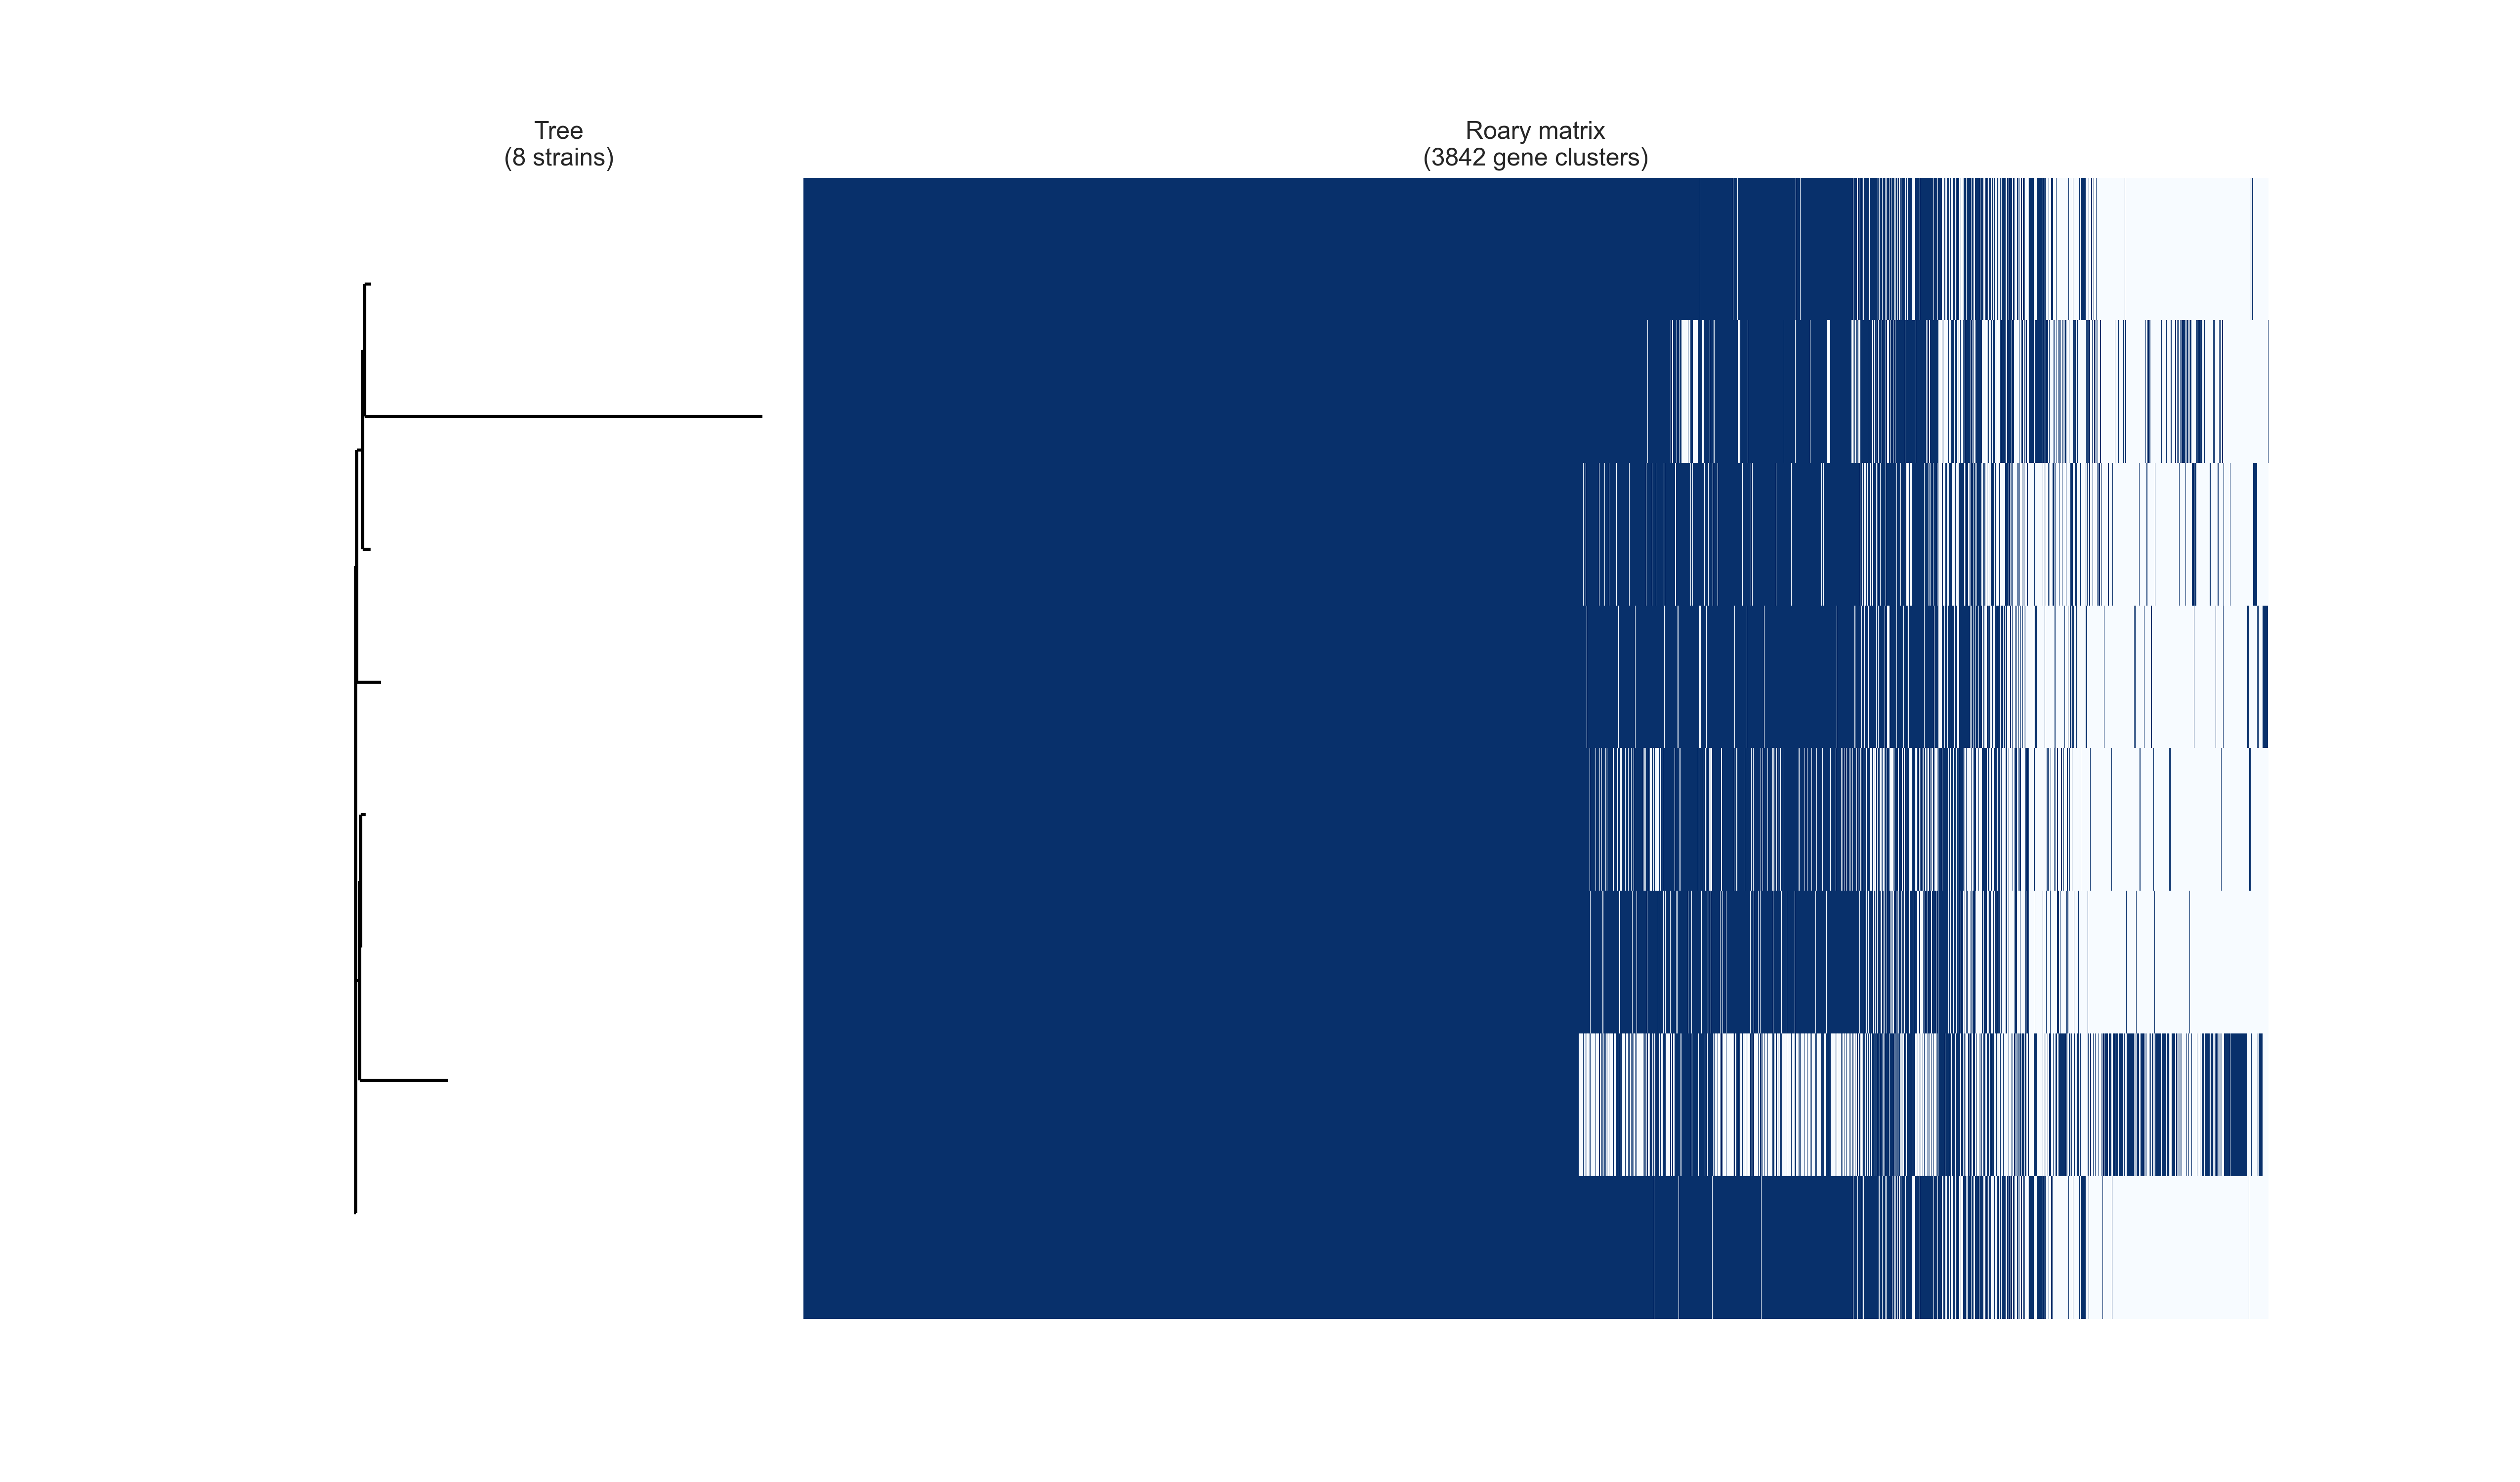

pangenome_matrix.png


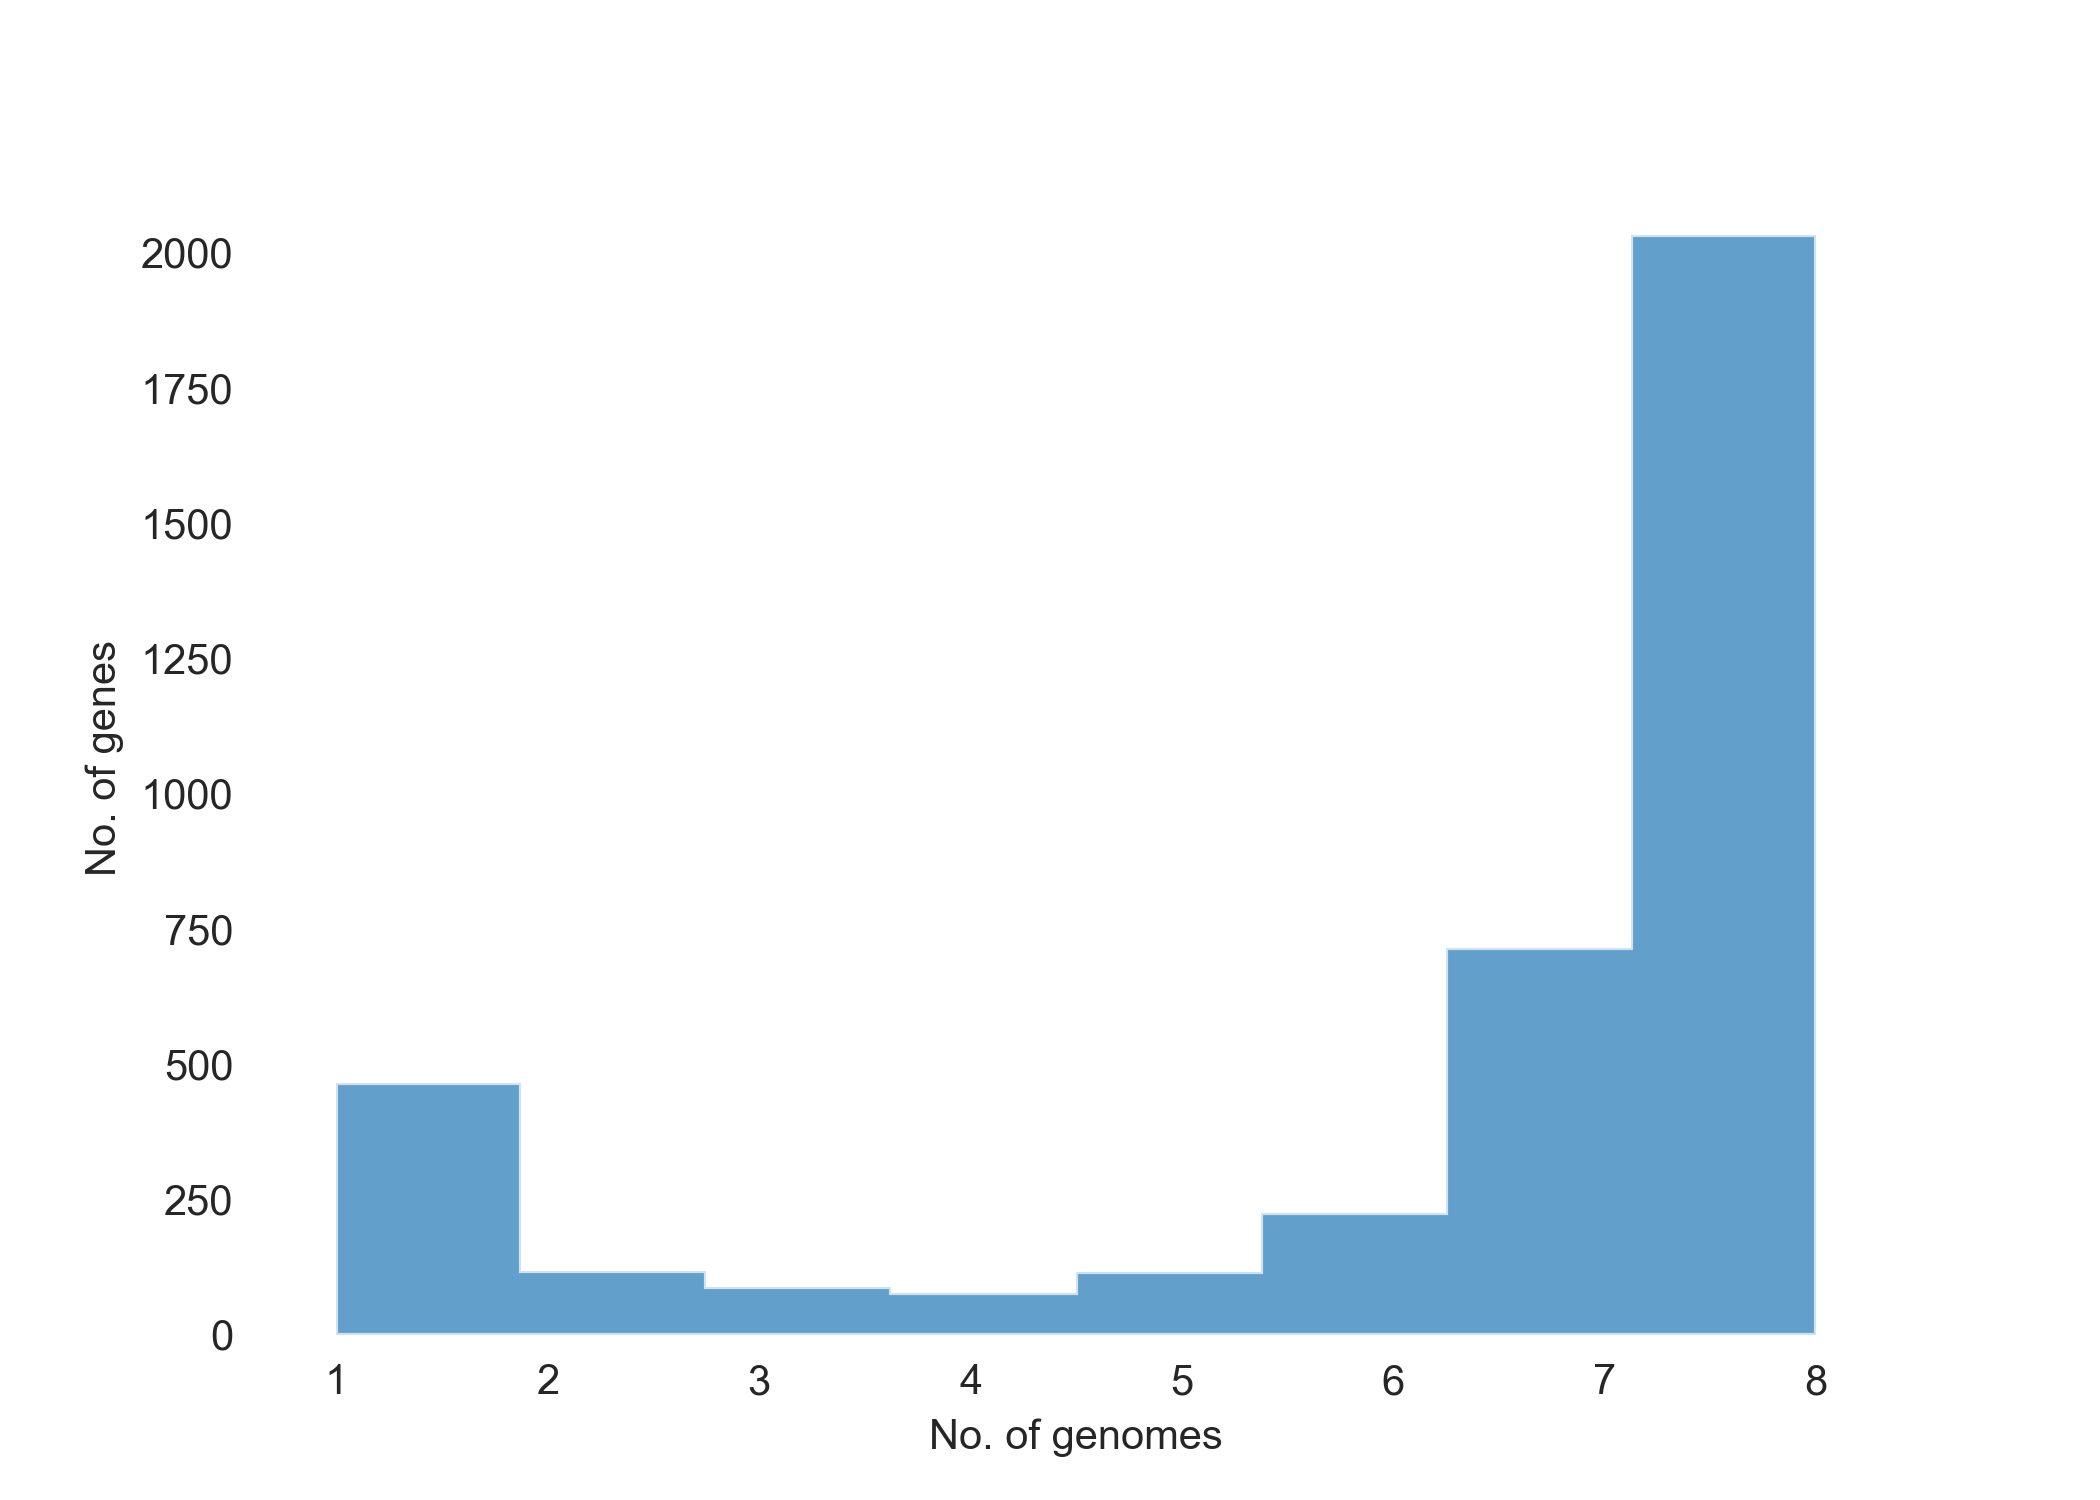

pangenome_frequency.png


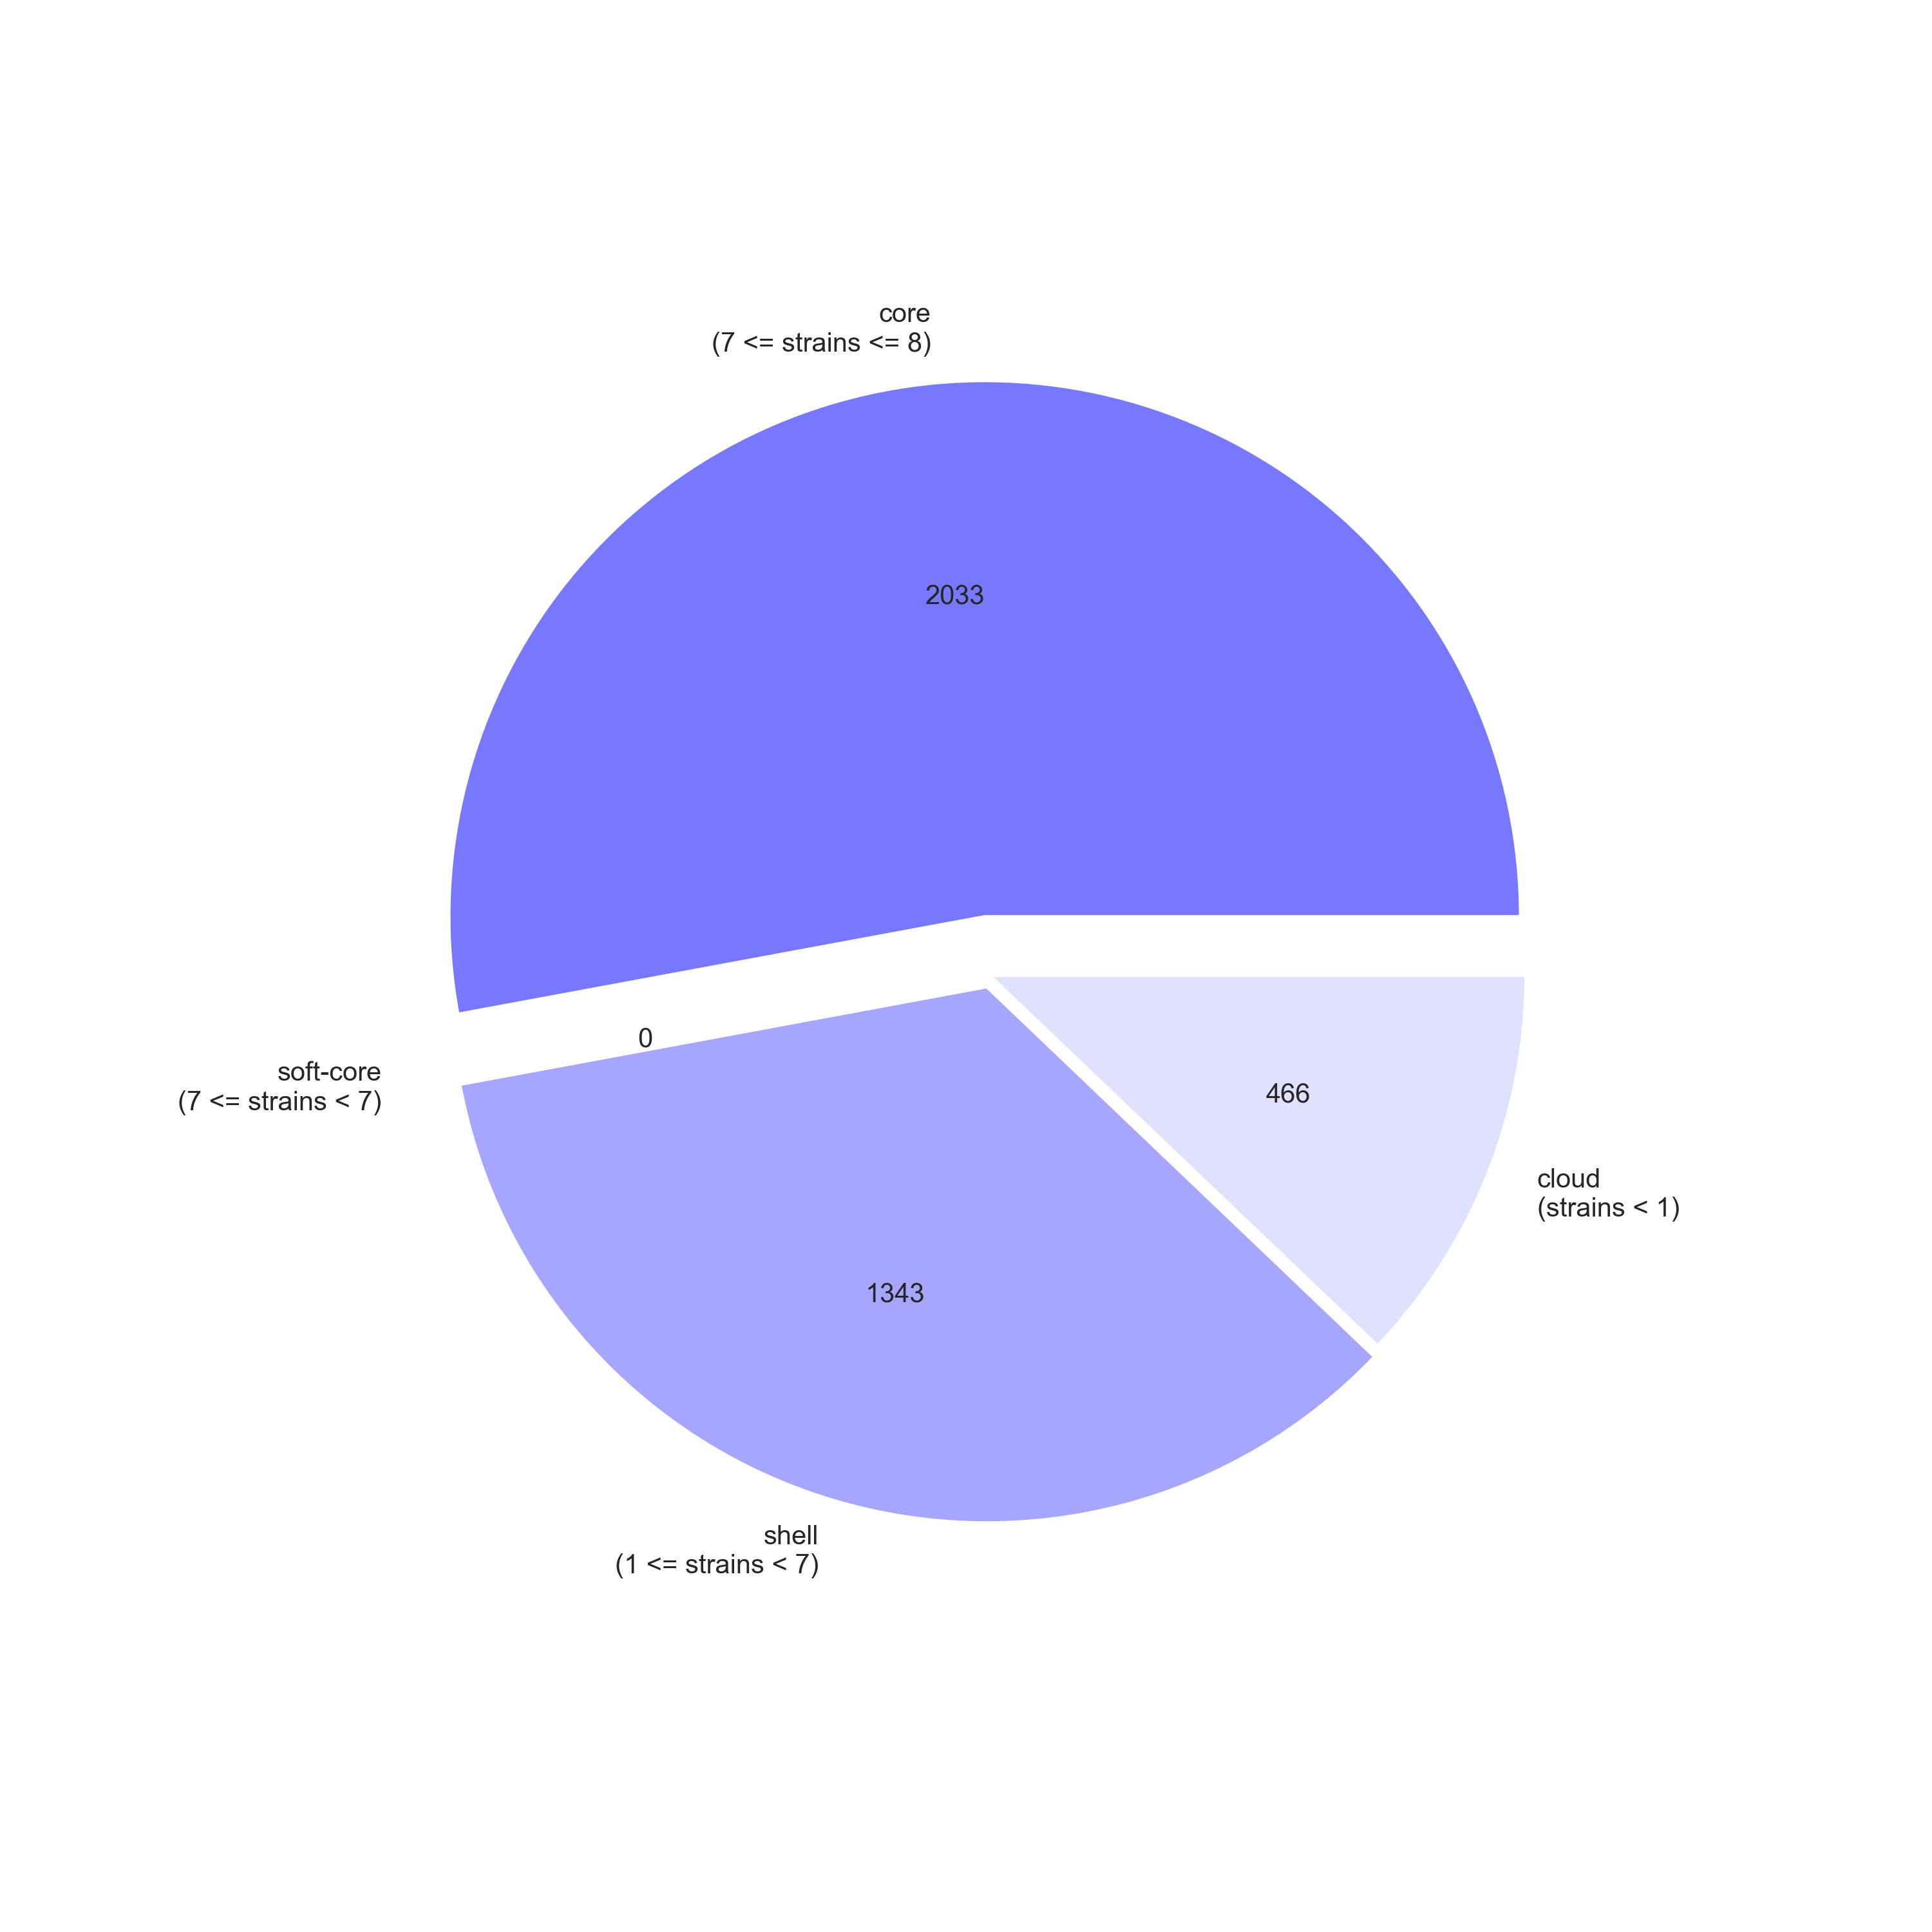

pangenome_pie.png


In [21]:
os.chdir(pwd + "/gff_files/roary")
for imageName in glob('*.png'):
    display(Image(filename=imageName))
    print(imageName)
os.chdir(pwd)

In [22]:
subprocess.run(f"rm {taxon_file}.json""", shell=True)
!rm accession_list.txt
!rm -r info_table.tsv
#!rm -r gff_files/*
#!rm annotated_genomes/*
subprocess.run(f"rm {taxon_file}.zip""", shell=True)
!rm README.md

In [23]:
#criteria for genome selection to strict (assembly-source genbank)? draft sequence -> we do annotation right?
#GenomeDiagramm library
#conda the best way?
#voila

#is it possible to have interaction in jupyter notebook
#circos (input-data?)
# download blast - read up on algorithm
#antismash


#1.upload own genome data
#if empty -> trna-scan, barrnap, prodigal (pcap includes them all)
#anvio